In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils
# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv(r'C:\Users\suzzy\Documents\food_data\food_data.csv')

## Basic information about the data

In [3]:

#basic description of data properties
df.shape

countries = df[['Reporter']]
countries.nunique()
df.Reporter.unique()
commodities = df[['Commodity']]
commodities.nunique()
df.Commodity.unique()
partners = df[['Partner']]
partners.nunique()
df.Partner.unique()
#check for column wise numm values
df.isnull().sum()
#data types
df.dtypes

(849267, 12)

Reporter    13
dtype: int64

array(['Canada', 'China', 'France', 'Germany', 'China, Hong Kong SAR',
       'India', 'Italy', 'Japan', 'Mexico', 'Netherlands',
       'Rep. of Korea', 'United Kingdom', 'USA'], dtype=object)

Commodity    42
dtype: int64

array(['Meat and edible meat offal',
       'Fish and crustaceans, molluscs and other aquatic invertebrates',
       "Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere specified or included",
       'Animal originated products; not elsewhere specified or included',
       'Vegetables and certain roots and tubers; edible',
       'Fruit and nuts, edible; peel of citrus fruit or melons',
       'Coffee, tea, mate and spices', 'Cereals',
       'Products of the milling industry; malt, starches, inulin, wheat gluten',
       'Oil seeds and oleaginous fruits; miscellaneous grains, seeds and fruit, industrial or medicinal plants; straw and fodder',
       'Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes',
       'Sugars and sugar confectionery', 'Cocoa and cocoa preparations',
       "Preparations of cereals, flour, starch or milk; pastrycooks' products",
       'Preparations of vegetables

Partner    247
dtype: int64

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Azerbaijan', 'Argentina', 'Australia',
       'Austria', 'Bahamas', 'Bahrain', 'Armenia', 'Barbados', 'Belgium',
       'Brazil', 'Belize', 'Br. Virgin Isds', 'Canada', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Dem. Rep. of the Congo',
       'Costa Rica', 'Cuba', 'Benin', 'Denmark', 'Dominica',
       'Dominican Rep.', 'Equatorial Guinea', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Georgia', 'Gambia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'China, Hong Kong SAR', 'Hungary', 'Iceland',
       'Indonesia', 'Iran', 'Ireland', 'Italy', "Côte d'Ivoire",
       'Jamaica', 'Japan', 'Jordan', 'Rep. of Korea', 'Liberia',
       'China, Macao SAR', 'Malaysia', 'Mauritius', 'Mexico',
       'Other Asia, nes', 'Rep. of Moldova', 'Montserrat', 'Mozambique',
       'Oman', 'Namibia', 'Netherlands', 

Unnamed: 0           0
Classification       0
Year                 0
Trade Flow Code      0
Trade Flow           0
Reporter Code        0
Reporter             0
Partner Code         0
Partner              0
Commodity Code       0
Commodity            0
Trade Value (US$)    0
dtype: int64

Unnamed: 0            int64
Classification       object
Year                  int64
Trade Flow Code       int64
Trade Flow           object
Reporter Code         int64
Reporter             object
Partner Code          int64
Partner              object
Commodity Code        int64
Commodity            object
Trade Value (US$)     int64
dtype: object

# Fazit 
We have 247 Trade Partners
42 commodities
13 Reporters
We can drop columns Unnamed 0, Classification, Reporter code, Partner code. Commodity code could be useful, because names are too long

Note: When reporter exports, it means they make profit. When they import, they make a loss

## Data Transformation

In [4]:
#drop unneccessary columns
df = df.drop(columns = ['Classification', 'Partner Code', 'Reporter Code', 'Unnamed: 0'])
df.columns

Index(['Year', 'Trade Flow Code', 'Trade Flow', 'Reporter', 'Partner',
       'Commodity Code', 'Commodity', 'Trade Value (US$)'],
      dtype='object')

In [5]:
#populate country abbreviation dictionary for replacement
df = utils.abbreviate_countries(df, 'Reporter')
df = utils.abbreviate_countries(df, 'Partner')
print(df.Reporter.unique())
print(df.Partner.unique())

['CA' 'CN' 'FR' 'DE' 'CN, HK' 'IN' 'IT' 'JP' 'MX' 'NL' 'KR' 'GB' 'USA']
['World' 'AF' 'AL' 'DZ' 'AO' 'AG' 'AZ' 'AR' 'AU' 'AT' 'BS' 'BH' 'AM' 'BB'
 'BE' 'BR' 'BZ' 'Br. Virgin Isds' 'CA' 'TD' 'CL' 'CN' 'CO' 'KM' 'CG'
 'Dem. Rep. of the Congo' 'CR' 'CU' 'BJ' 'DK' 'DM' 'Dominican Rep.' 'GQ'
 'FI' 'FR' 'PF' 'GA' 'GE' 'GM' 'DE' 'GH' 'GR' 'GL' 'GD' 'GN' 'GY' 'HT'
 'HN' 'CN, HK' 'HU' 'IS' 'ID' 'Iran' 'IE' 'IT' 'CI' 'JM' 'JP' 'JO' 'KR'
 'LR' 'CN, MO' 'MY' 'MU' 'MX' 'Other Asia, nes' 'Rep. of Moldova' 'MS'
 'MZ' 'OM' 'NA' 'NL' 'CW' 'AW' 'Saint Maarten' 'Bonaire' 'NZ' 'PA' 'PY'
 'PE' 'PH' 'PN' 'PL' 'PT' 'KN' 'AI' 'LC' 'PM' 'VC' 'SA' 'SN' 'RS' 'SC'
 'SG' 'VN' 'ZA' 'ES' 'EH' 'SR' 'SE' 'CH' 'TJ' 'TH' 'TG' 'TO' 'TT' 'AE'
 'TN' 'Turks and Caicos Isds' 'UA' 'MK' 'GB' 'USA' 'BF' 'UY' 'WS' 'AS'
 'BD' 'BM' 'BN' 'BG' 'MM' 'BY' 'KH' 'CV' 'LK' 'Christmas Isds' 'HR' 'CY'
 'CZ' 'EC' 'SV' 'ET' 'EE' 'Faeroe Isds' 'Falkland Isds (Malvinas)' 'FJ'
 'DJ' 'GU' 'GT' 'IL' 'KZ' 'KE' 'KW' "Lao People's Dem. Rep." 'LB' 'L

In Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype

In [6]:
df['Trade Flow'] = df['Trade Flow'].astype('category') 
df['Reporter'] = df['Reporter'].astype('category') 
df['Partner'] = df['Partner'].astype('category') 
df['Commodity'] = df['Commodity'].astype('category')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

print(df.dtypes)

Year                 datetime64[ns]
Trade Flow Code               int64
Trade Flow                 category
Reporter                   category
Partner                    category
Commodity Code                int64
Commodity                  category
Trade Value (US$)             int64
dtype: object


## Frequency Distributions

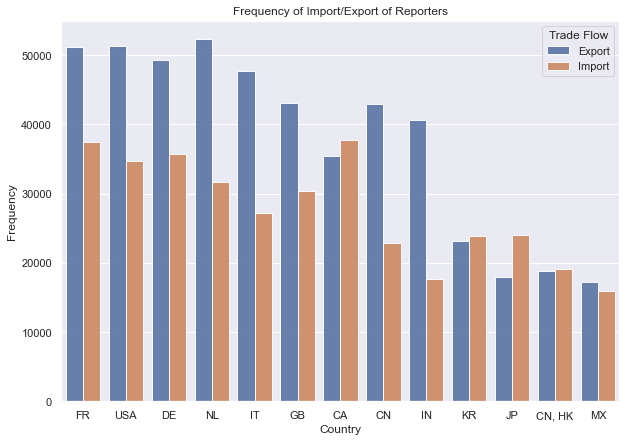

In [7]:
plt.figure(figsize=(10,7))
country_count = df['Reporter'].value_counts()
sns.set(style="darkgrid")
sns.countplot(order = country_count.index, data=df, hue='Trade Flow', alpha=0.9, x="Reporter")
plt.title('Frequency of Import/Export of Reporters')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show();

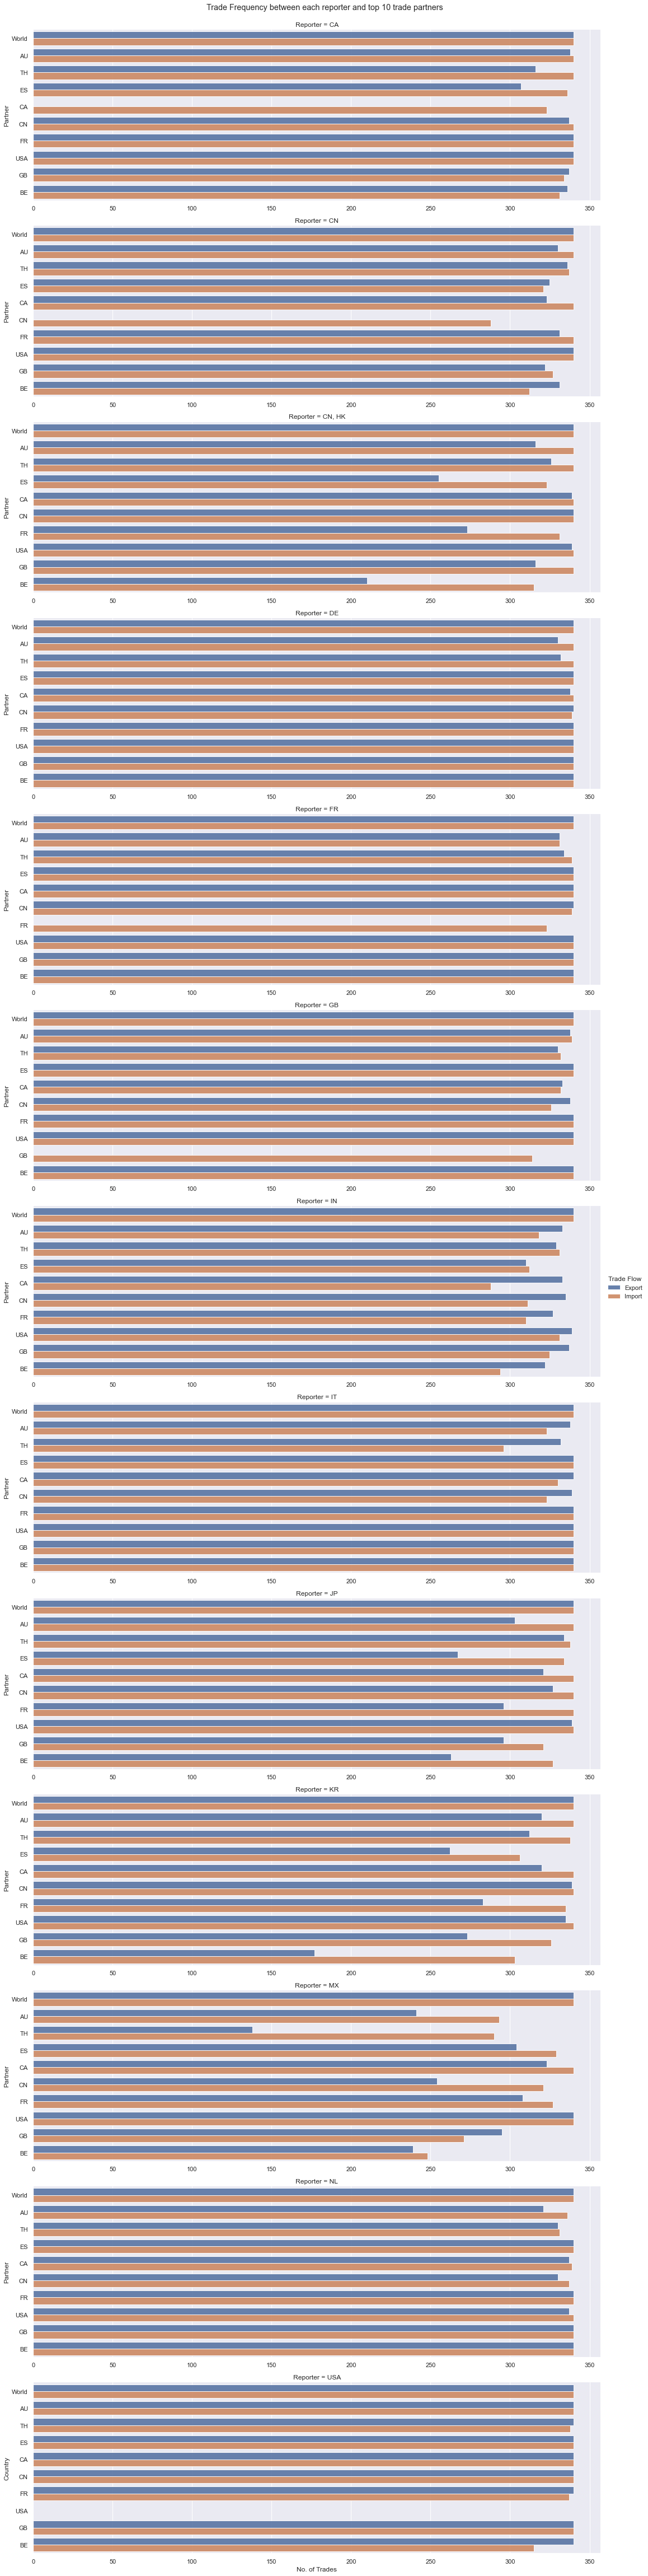

In [8]:

#ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format))

#df_agg = (df.groupby(['Reporter', 'Trade Flow', 'Partner']).value_counts()
sns.set(style="darkgrid")
g = sns.catplot(y="Partner",  data=df, hue="Trade Flow", row='Reporter', kind="count",
              order=df['Partner'].value_counts().iloc[:10].index, alpha=0.9,  aspect=3, orient='h', sharey = False, sharex=False )
plt.subplots_adjust(top=0.97)
g.fig.suptitle('Trade Frequency between each reporter and top 10 trade partners')

plt.xlabel('No. of Trades', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show();

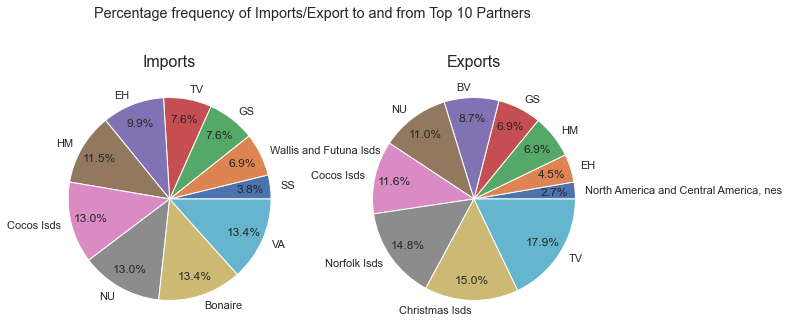

In [9]:
sns.set_style("whitegrid")

df_t = df.groupby(['Partner', 'Trade Flow']).count()['Reporter'].reset_index()
imports = df_t[df_t['Trade Flow']=='Import'].sort_values('Reporter', ascending=True)[:10].copy()
exports = df_t[df_t['Trade Flow']=='Export'].sort_values('Reporter', ascending=True)[:10].copy()
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
ax = imports.plot(kind='pie', y='Reporter', autopct="%.1f%%",pctdistance=0.8, labels=imports['Partner'], ax = axes[0])
ax.set_ylabel('')
ax.get_legend().remove()
ax = exports.plot(kind='pie', y='Reporter', autopct="%.1f%%",pctdistance=0.8, labels=exports['Partner'], ax = axes[1])
ax.set_ylabel('')
ax.get_legend().remove()

plt.subplots_adjust(top=1.3)
plt.suptitle('Percentage frequency of Imports/Export to and from Top 10 Partners')
axes[0].set_title('Imports', fontsize=16)
axes[1].set_title('Exports', fontsize=16)

plt.show();

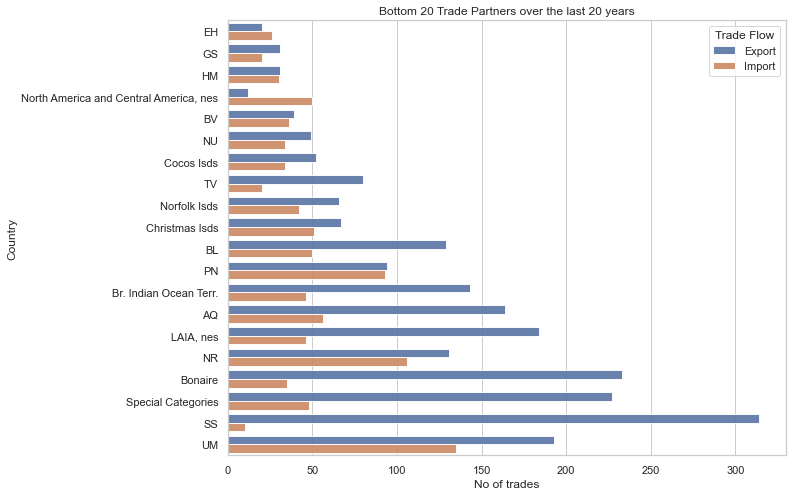

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(y="Partner",  data=df, hue="Trade Flow",
              order=df['Partner'].value_counts(ascending=True).iloc[:20].index, alpha=0.9)
plt.title('Bottom 20 Trade Partners over the last 20 years')
plt.xlabel('No of trades', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show();

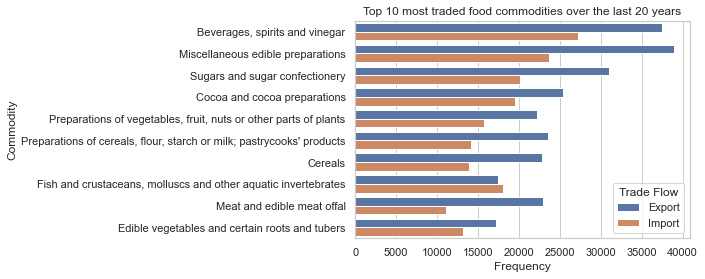

In [11]:
sns.countplot(y="Commodity",  data=df, hue="Trade Flow",
              order=df['Commodity'].value_counts(ascending=False).iloc[:10].index)
plt.title('Top 10 most traded food commodities over the last 20 years')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Commodity', fontsize=12)
plt.show();

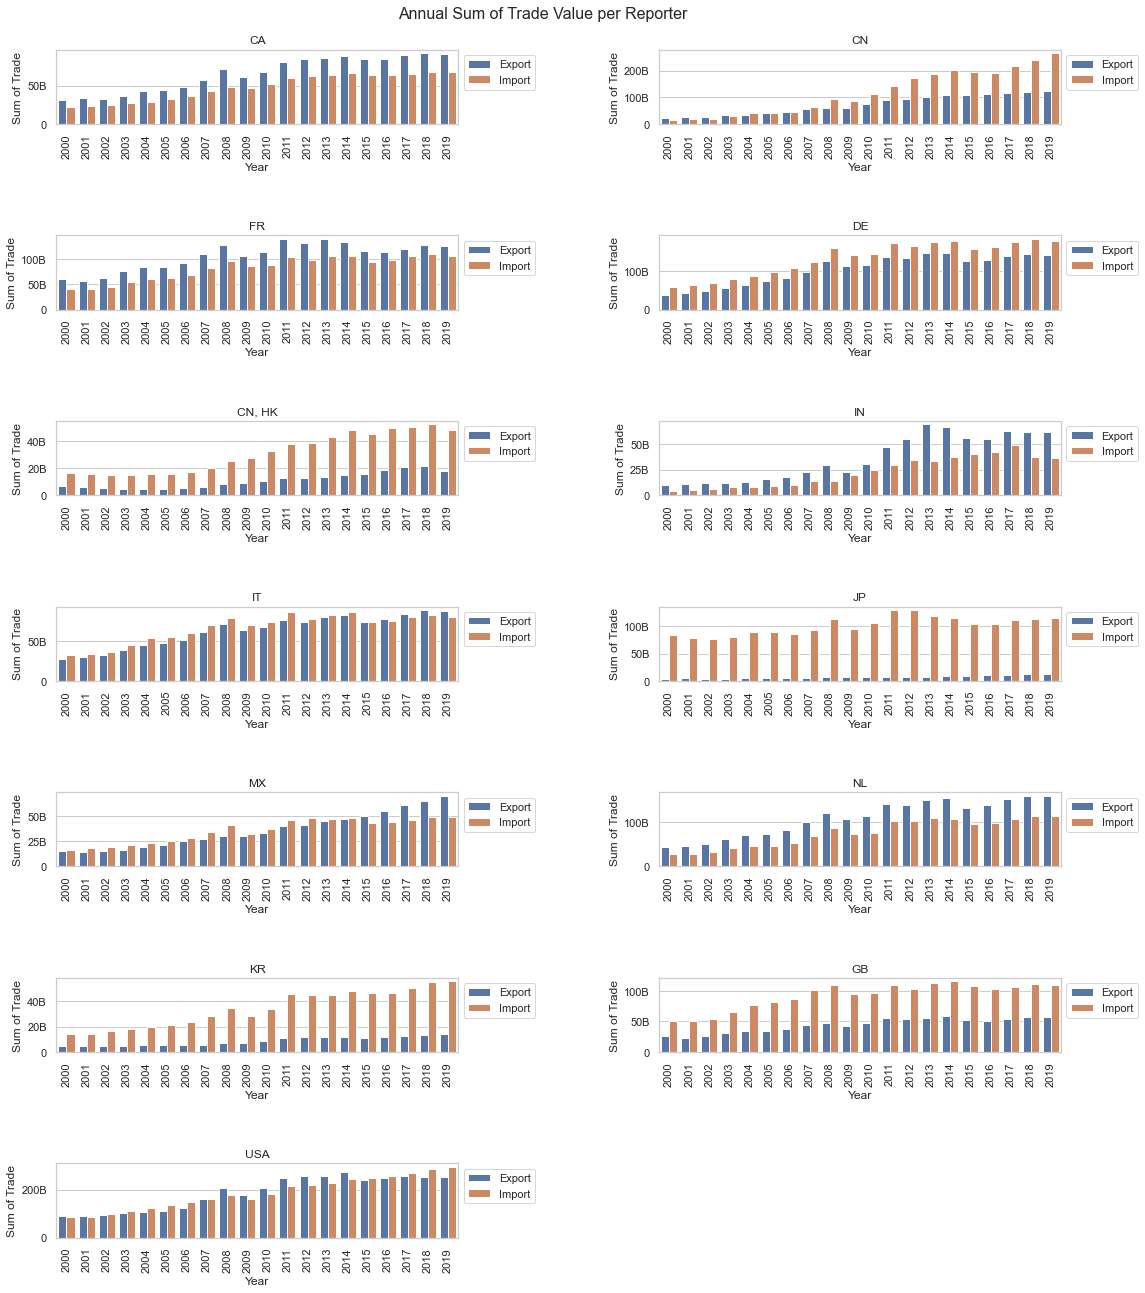

In [12]:

#ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format))

df_agg = (df.groupby(['Year', 'Reporter', 'Trade Flow']).agg(Trade_Value=("Trade Value (US$)", "sum"))).reset_index()
#years = pd.DatetimeIndex(df_agg['Year'].unique()).year
categories = df['Reporter'].unique().tolist()
fig = plt.figure(figsize=(18,20))
spec2 = gridspec.GridSpec(ncols=2, nrows=7, figure=fig)
fig.tight_layout()
fig.subplots_adjust(hspace=1.5, wspace=0.5, top=0.95)
count = 0

for a in range(7):
    for b in range(2):
        if count != 13:
            cat = categories[count]
            x = df_agg[df_agg['Reporter'] ==cat]["Year"]
            y = df_agg[df_agg['Reporter'] == cat]["Trade_Value"]
            ax = fig.add_subplot(spec2[a,b]);
            sns.barplot(ax=ax, x=x, y=y, data=df_agg, hue="Trade Flow");
            ax.legend(loc="upper left", bbox_to_anchor=(1,1));
            ax.set_xticklabels(pd.DatetimeIndex(df_agg['Year'].unique()).year);
            #ax.yaxis.set_ticks(np.arange(0, 100000000, 100000000000));
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
            plt.xticks(rotation=90);
            ax.set_xlabel('Year');
            ax.set_ylabel('Sum of Trade');
            ax.set_title(cat);
            count = count +1
        
fig.suptitle("Annual Sum of Trade Value per Reporter", fontsize=16);

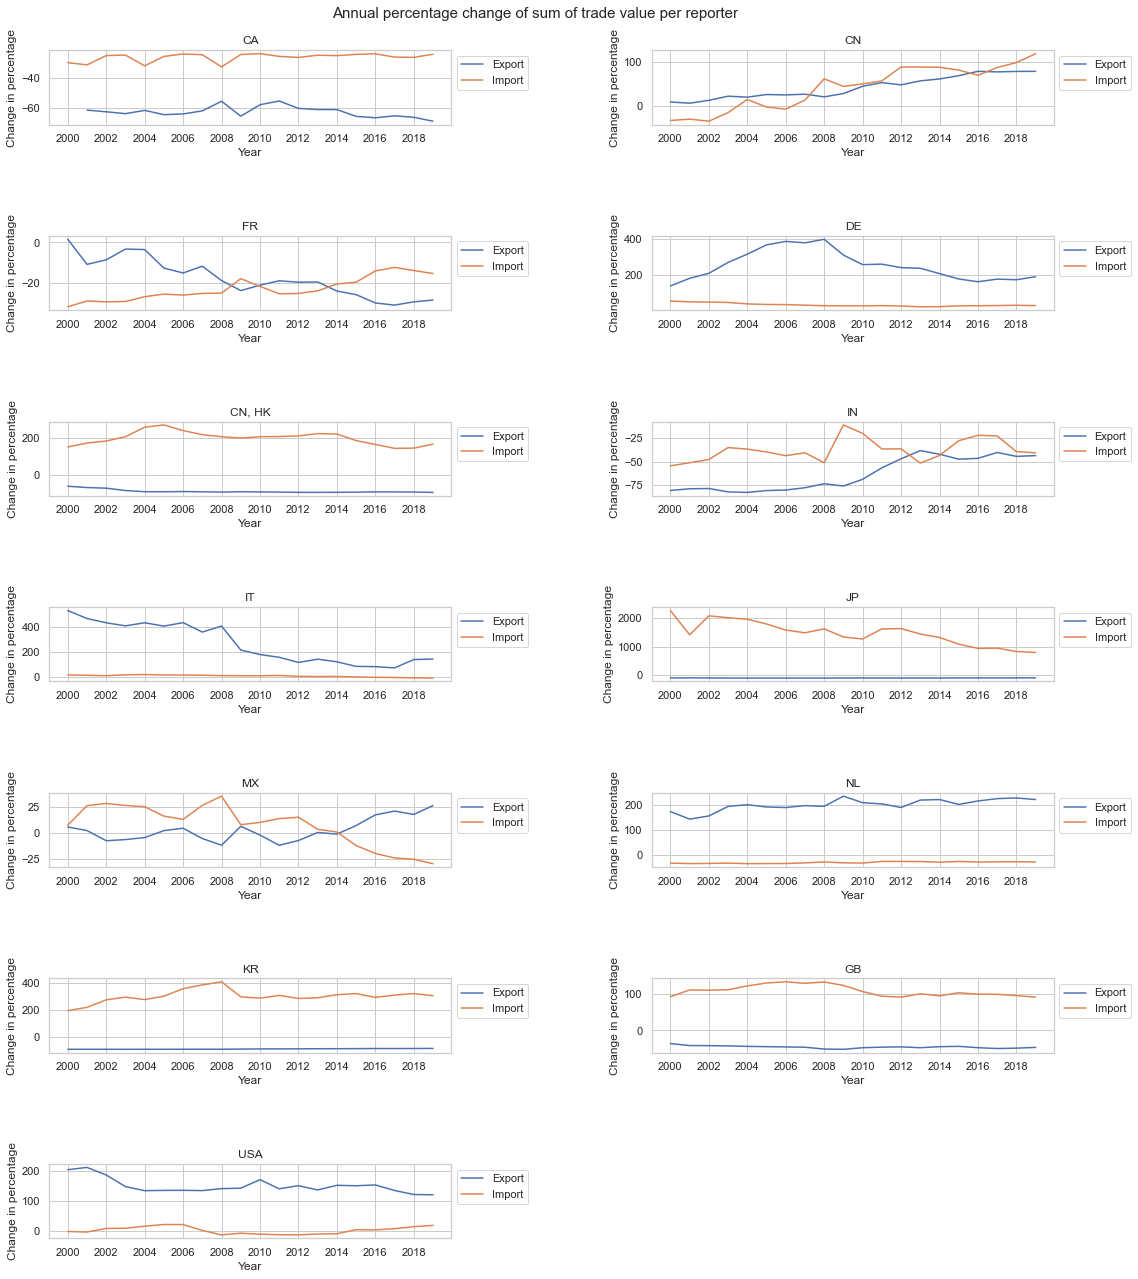

In [13]:
df_agg = (df.groupby(['Year', 'Reporter', 'Trade Flow']).agg(Trade_Value=("Trade Value (US$)", "sum"))).pct_change(periods=1)*100
df_agg = df_agg.reset_index()
categories = df['Reporter'].unique().tolist()
fig = plt.figure(figsize=(18,20))
spec2 = gridspec.GridSpec(ncols=2, nrows=7, figure=fig)
fig.tight_layout()
fig.subplots_adjust(hspace=1.5, wspace=0.5, top=0.95)
count = 0
for a in range(7):
    for b in range(2):
        if count != 13:
            cat = categories[count]
            x = df_agg[df_agg['Reporter'] ==cat]["Year"]
            y = df_agg[df_agg['Reporter'] == cat]["Trade_Value"]
            ax = fig.add_subplot(spec2[a,b])
            sns.lineplot(x=x, y=y, hue='Trade Flow', data=df_agg[df_agg['Reporter'] ==cat])
            ax.legend(loc="upper left", bbox_to_anchor=(1,1));
            #ax.plot(x,y);
            #ax.yaxis.set_ticks(np.arange(-50, 50, 200))
            ax.set_xlabel('Year');
            ax.set_ylabel('Change in percentage');
            ax.set_title(cat);
            count = count +1
        
fig.suptitle("Annual percentage change of sum of trade value per reporter", fontsize=15);

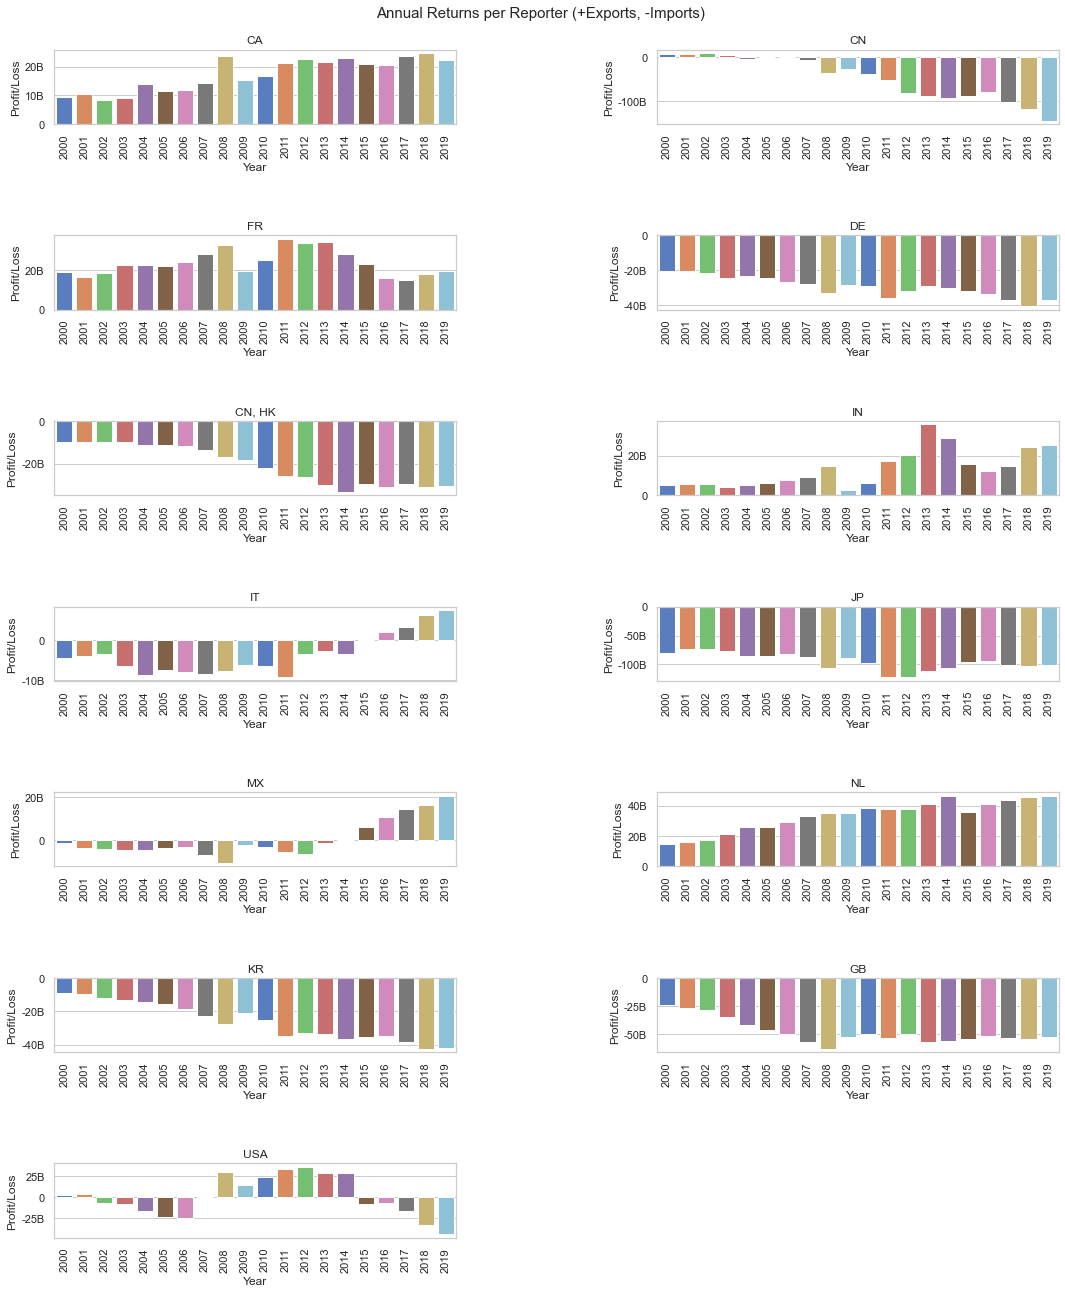

In [18]:
df_g = df.copy()
df_g.loc[(df_g['Trade Flow'] =='Import', 'Trade Value (US$)')] *= -1
df_agg = (df_g.groupby(['Year', 'Reporter']).agg(Trade_Value=("Trade Value (US$)", "sum"))).reset_index()
categories = df['Reporter'].unique().tolist()
fig = plt.figure(figsize=(18,20))
spec2 = gridspec.GridSpec(ncols=2, nrows=7, figure=fig)
fig.tight_layout()
fig.subplots_adjust(hspace=1.5, wspace=0.5, top=0.95)
count = 0
for a in range(7):
    for b in range(2):
        if count != 13:
            cat = categories[count]
            x = df_agg[df_agg['Reporter'] ==cat]["Year"]
            y = df_agg[df_agg['Reporter'] == cat]["Trade_Value"]
            ax = fig.add_subplot(spec2[a,b])
            
            ax = sns.barplot(ax=ax, x=x, y=y, data=df_agg, palette='muted');
            #ax.legend(loc="upper left", bbox_to_anchor=(1,1));
            ax.set_xticklabels(pd.DatetimeIndex(df_agg['Year'].unique()).year);
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
            plt.xticks(rotation=90);
            ax.set_xlabel('Year');
            ax.set_ylabel('Profit/Loss');
            ax.set_title(cat);
            
            count = count +1
        
fig.suptitle("Annual Returns per Reporter (+Exports, -Imports)", fontsize=15);

## Binary Encoding

In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions.

You can do binary encoding via a number of ways but the simplest one is using the category_encoders library. You can install category_encoders via 'pip install category_encoders' on cmd.

You have to first import the category_encoders library after installing it. Invoke the BinaryEncoder function by specifying the columns you want to encode and then call the .fit_transform() method on it with the DataFrame as the argument.

In [15]:
#df_ce = df.copy()
#df_ce = df_ce.drop(columns = ['Unnamed: 0','Trade Flow Code', 'Reporter Code', 'Partner Code', 'Commodity Code'])
#encoder = ce.BinaryEncoder(cols=['Partner'])
#df_binary = encoder.fit_transform(df_ce)

#df_binary.head()

In [16]:
#visualize country by trade partner and trade flow

In [17]:
#visualize country by year trade flows, trade value